# Logistic Regression

## Data Exploration

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# dropping column pasengerID,Name,Ticket and Cabin
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

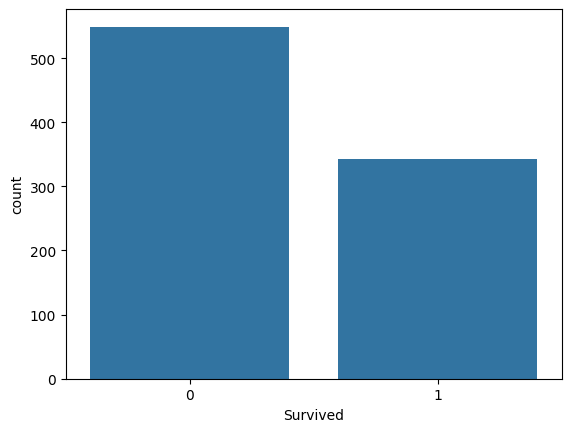

In [16]:
# countplot for Survived
sns.countplot(x='Survived',data=df)

In [15]:
#  Survived / Sex
pd.crosstab(df['Survived'],df['Sex'])

# female survival rate is high

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived', ylabel='count'>

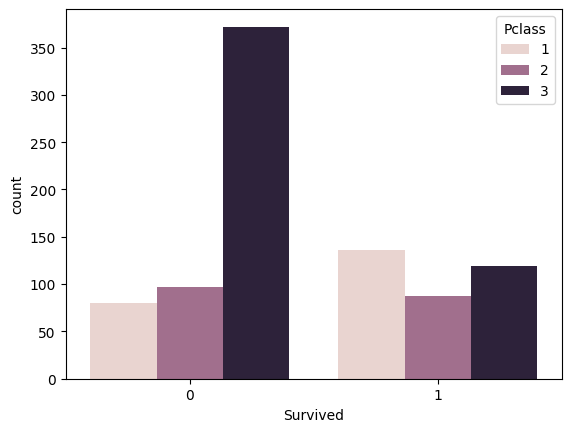

In [10]:
# survived + Pclass
sns.countplot(x='Survived',hue='Pclass',data=df)

# 1st class survival rate is more compared to other

In [22]:
# Survived / SibSp
pd.crosstab(df['Survived'],df['SibSp'])

# Survival rate is negatively correlated to SibSp (But weak)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [24]:
# survived / Parch
pd.crosstab(df['Survived'],df['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [25]:
# Survived / Embarked
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<Axes: xlabel='Survived', ylabel='Fare'>

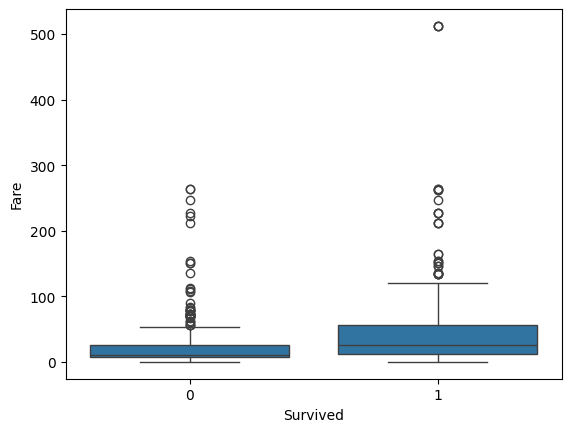

In [26]:
# Survived / Fare better plot to visualise
sns.boxplot(x='Survived',y='Fare',data=df)

## Data Preprocessing

In [28]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [31]:
# handling missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


<ipython-input-31-b100fcbe585d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
<ipython-input-31-b100fcbe585d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [34]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
df.shape

(891, 8)

In [39]:
# assigining X and Y variables
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

In [41]:
# coeffecients of features
classifier.coef_

array([[-1.04889679e+00, -2.63138591e+00, -3.84947312e-02,
        -3.17599571e-01, -9.02002213e-02,  2.13981143e-03,
        -2.19340631e-01]])

In [42]:
# probablity values
classifier.predict_proba(X)

array([[0.90607946, 0.09392054],
       [0.08148896, 0.91851104],
       [0.37056982, 0.62943018],
       ...,
       [0.51934108, 0.48065892],
       [0.38175676, 0.61824324],
       [0.89221947, 0.10778053]])

In [43]:
# predict y
y_pred = classifier.predict(X)
df['y_pred'] = y_pred
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y_pred
0,0,3,1,22.000000,1,0,7.2500,2,0
1,1,1,0,38.000000,1,0,71.2833,0,1
2,1,3,0,26.000000,0,0,7.9250,2,1
3,1,1,0,35.000000,1,0,53.1000,2,1
4,0,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,0
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,0
889,1,1,1,26.000000,0,0,30.0000,0,1


In [44]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm

array([[473,  76],
       [102, 240]])

In [45]:
# accuracy
accuracy = sum(y==y_pred)/df.shape[0]
accuracy

0.8002244668911336

In [63]:
# clasification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [65]:
# roc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)

0.7816604352411083

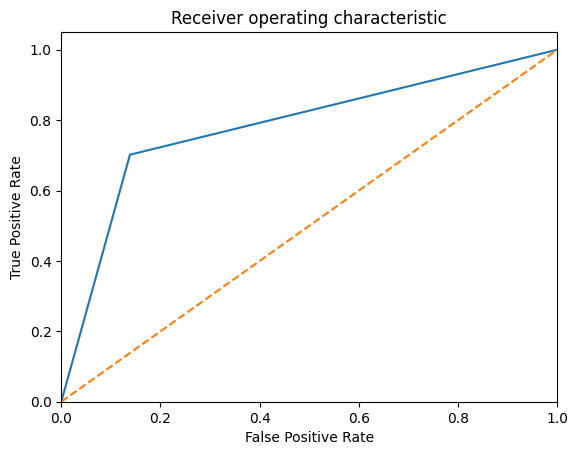

In [67]:
# roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## Model Evaluation

In [57]:
# loading test data
df_test = pd.read_csv('Titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
# removing unnecessary columns & handling null values
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
df_test

<ipython-input-58-9673e8104013>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
<ipython-input-58-9673e8104013>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [60]:
# encoding sex and embarked
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [61]:
# predicting survived rate
y_pred_test = classifier.predict(df_test)
df_test['Survived'] = y_pred_test
df_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.50000,0,0,7.8292,1,0
1,3,0,47.00000,1,0,7.0000,2,0
2,2,1,62.00000,0,0,9.6875,1,0
3,3,1,27.00000,0,0,8.6625,2,0
4,3,0,22.00000,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,0
414,1,0,39.00000,0,0,108.9000,0,1
415,3,1,38.50000,0,0,7.2500,2,0
416,3,1,30.27259,0,0,8.0500,2,0


## Interpretation



In [69]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.440542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.3384
Time:                        13:53:36   Log-Likelihood:                -392.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.078e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2890      0.565      9.353      0.000       4.181       6.397
x1            -1.0847      0.139     -7.782      0.000      -1.358      -0.811
x2            -2.7413      0.199    -13.766      0.000      -3.132      -2.351
x3            -0.0394      0.008     -5.036      0.000      -0.055      -0.024
x4            -0.3288      0.110     -2.995      0.003      -0.544      -0.114
x5            -0.1012      0.118     -0.857      0.392      -0.333       0.130
x6             0.0020      0.002      0.823      0.410      -0.003       0.007
x7            -0.2213      0.115     -1.924      0.054      -0.447       0.004
==============================================================================
"""




*   Survived is highly dependent on Pclass & Sex compared to remaining features.
*   Parch, Fare & Embarked are least significant features.



## Interview Questions

*   **Precision** is conditional probability of correctly predicted positives given all predicted positives where as **Recall** is conditional probability of correctly predicted positives of all actual positives
*   Cross validation is partitioning the available data into train & test data. It increases model performance, avoid memorizing (i.e., overfitting), Handling limited data, Model selection (applying different model on different subsets and choosing the best output - Ensembling Techniques)

